In [ ]:
import math 
import numpy as np # Fundamental package for scientific computing with Python
import pandas as pd # For analysing and manipulating data
from datetime import date, timedelta # Date Functions
import matplotlib.pyplot as plt # For visualization
import matplotlib.dates as mdates # Formatting dates
from sklearn.metrics import mean_absolute_error, mean_squared_error # For measuring model performance / errors
from sklearn.preprocessing import MinMaxScaler #to normalize the price data 
from tensorflow.keras.models import Sequential # Deep learning library, used for neural networks
from tensorflow.keras.layers import LSTM, Dense # Deep learning classes for recurrent and regular densely-connected layers
import tensorflow as tf
import seaborn as sns
sns.set_style('white', { 'axes.spines.right': False, 'axes.spines.top': False})

In [ ]:
df = pd.read_csv('/content/data2022_train.csv', index_col='Unnamed: 0',parse_dates=True)

In [ ]:
df

,y
2017-01-01 00:00:00,34055.69620
2017-01-01 00:10:00,29814.68354
2017-01-01 00:20:00,29128.10127
2017-01-01 00:30:00,28228.86076
2017-01-01 00:40:00,27335.69620
...,...
2017-11-30 23:10:00,31347.69231
2017-11-30 23:20:00,30603.07692
2017-11-30 23:30:00,29889.23077
2017-11-30 23:40:00,29249.23077


AxesSubplot(0.125,0.125;0.775x0.755)


<Figure size 432x288 with 0 Axes>

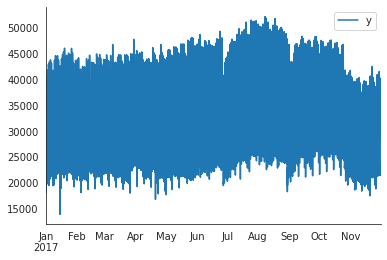

In [ ]:
plt.figure()
print(df.plot(y='y'))

In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten, Dropout

In [ ]:
df_train, df_val = train_test_split(
    df,
    train_size=0.9,
    shuffle=False
)

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
df1_scaled_train=sc.fit_transform(df_train)

In [ ]:
df1_scaled_train.shape[0]

43286

In [ ]:
hops = 4320
total_len = df1_scaled_train.shape[0]
x_train=[]
y_train=[]

for i in range(hops,total_len):
  x_train.append(df1_scaled_train[i-hops:i])
  y_train.append(df1_scaled_train[i])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
m1_len=x_train.shape[0]
m2_len=x_train.shape[1]

In [ ]:
model=Sequential()

model.add(LSTM(units=25, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=20))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss='mse')


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 4320, 25)          2700      
                                                                 
 lstm_3 (LSTM)               (None, 20)                3680      
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 6,401
Trainable params: 6,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size = 300)

Epoch 1/5
130/130 [==============================] - 964s 7s/step - loss: 0.0206
Epoch 2/5
130/130 [==============================] - 944s 7s/step - loss: 0.0033
Epoch 3/5
130/130 [==============================] - 941s 7s/step - loss: 0.0018
Epoch 4/5
130/130 [==============================] - 938s 7s/step - loss: 0.0014
Epoch 5/5
130/130 [==============================] - 933s 7s/step - loss: 0.0011


In [ ]:
df_total = df
df1_new=df_total.values
test_arr=df1_new[len(df1_new)-len(df_val)-hops:]

In [ ]:
test_arr1 = sc.transform(test_arr.reshape(-1,1))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
test_arr1.shape

(9130, 1)

In [ ]:
n_hops = 4320
n_features = 1 
x_test=[]
y_test=[]
for i in range(n_hops, test_arr1.shape[0]):
  x_test.append(test_arr1[i-n_hops:i])
x_test=np.array(x_test)

In [ ]:
y_test_pred = model.predict(x_test)

151/151 [==============================] - 81s 531ms/step


In [ ]:
y_test_pred.shape

(4810, 1)

In [ ]:
y_test_pred.shape

(4810, 1)

In [ ]:
y_test_pred_actual = sc.inverse_transform(y_test_pred)
y_test_pred_actual =  y_test_pred_actual[:, 0]

In [ ]:
test_pred = pd.DataFrame(y_test_pred_actual, columns = ['actual'])
full_test_actual = pd.concat([df_val, test_pred])

In [ ]:
full_test_actual = df_val
full_test_actual['pred'] = y_test_pred_actual

In [ ]:
full_test_actual

,y,pred
2017-10-28 14:20:00,31100.21882,31807.121094
2017-10-28 14:30:00,30722.10066,31697.662109
2017-10-28 14:40:00,30797.72429,31514.359375
2017-10-28 14:50:00,30539.34354,31342.761719
2017-10-28 15:00:00,30457.41794,31150.705078
...,...,...
2017-11-30 23:10:00,31347.69231,32842.855469
2017-11-30 23:20:00,30603.07692,32227.685547
2017-11-30 23:30:00,29889.23077,31534.845703
2017-11-30 23:40:00,29249.23077,30790.322266


[]

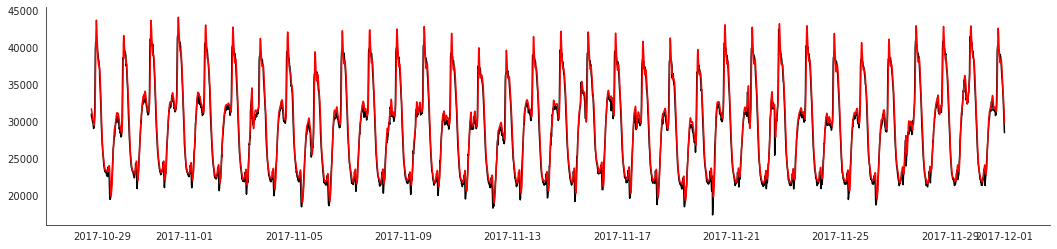

In [ ]:
plt.figure(figsize=(18, 4))
plt.plot(full_test_actual['y'], color='black')
plt.plot(full_test_actual['pred'], color = 'red')
plt.plot()

In [ ]:
def mape(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions)/y_true*100)

def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

print('MAE: ', mae(full_test_actual['y'], full_test_actual['pred']))
print('MAPE: ', mape(full_test_actual['y'], full_test_actual['pred']))

MAE:  856.1010625239085
MAPE:  2.9414906273788515


# previsione nuovi

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
df1_scaled_train=sc.fit_transform(df)

In [ ]:
df1_scaled_train.shape[0]

48096

In [ ]:
hops = 4464
total_len = df1_scaled_train.shape[0]
x_train=[]
y_train=[]

for i in range(hops,total_len):
  x_train.append(df1_scaled_train[i-hops:i])
  y_train.append(df1_scaled_train[i])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
m1_len=x_train.shape[0]
m2_len=x_train.shape[1]

In [ ]:
model=Sequential()

model.add(LSTM(units=25, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=20))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4464, 25)          2700      
                                                                 
 lstm_1 (LSTM)               (None, 20)                3680      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 6,401
Trainable params: 6,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size = 300)

Epoch 1/5
146/146 [==============================] - 1164s 8s/step - loss: 0.0277
Epoch 2/5
146/146 [==============================] - 1158s 8s/step - loss: 0.0029
Epoch 3/5
146/146 [==============================] - 1153s 8s/step - loss: 0.0017
Epoch 4/5
146/146 [==============================] - 1151s 8s/step - loss: 0.0012
Epoch 5/5
146/146 [==============================] - 1158s 8s/step - loss: 9.0850e-04


In [ ]:
df_total = df
df1_new=df_total.values
test_arr=df1_new[len(df1_new)-hops:]

In [ ]:
test_arr1 = sc.transform(test_arr.reshape(-1,1))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
test_arr1.shape

(4464, 1)

In [ ]:
test_arr1[2]

array([0.32671058])

In [ ]:
n_hops=4464
n_features = 1 
x_test=[]
y_test=[]
for i in range(0, test_arr1.shape[0]):
  x_test.append(test_arr1[i])
x_test=np.array(x_test)

In [ ]:
i=4464

In [ ]:
x_test

array([[0.35368939],
       [0.34349009],
       [0.32671058],
       ...,
       [0.41749094],
       [0.40078455],
       [0.38343561]])

In [ ]:
x_test.shape

(4464, 1)

In [ ]:
x_test2 = x_test[:,:,None]
x_test2.shape

(4464, 1, 1)

In [ ]:
x_test2 = np.expand_dims(x_test, axis=0)
#x_test2 =  x_test2[:, None, ]
x_test2.shape

(1, 4464, 1)

In [ ]:
y_test_pred = model.predict(x_test2)

140/140 [==============================] - 0s 2ms/step


In [ ]:
y_test_pred.shape

(4464, 1)

In [ ]:
#y_test_pred =  y_test_pred[:, :, 0]

In [ ]:
y_test_pred_actual = sc.inverse_transform(y_test_pred)
y_test_pred_actual =  y_test_pred_actual[:, 0]
y_test_pred_actual.shape

(4464,)

In [ ]:
y_test_pred_actual

array([16162.765, 16133.331, 16085.174, ..., 16349.668, 16300.265,
       16249.309], dtype=float32)

In [ ]:
test_pred = pd.DataFrame(y_test_pred_actual, columns = ['actual'])

In [ ]:
test_pred['actual'] = test_pred['actual']*2
test_pred

,actual
0,32325.529297
1,32266.662109
2,32170.347656
3,32117.753906
4,32076.570312
...,...
4459,32926.941406
4460,32810.312500
4461,32699.335938
4462,32600.529297


In [ ]:
test_pred.to_csv('LSTM_pred2.csv')

[]

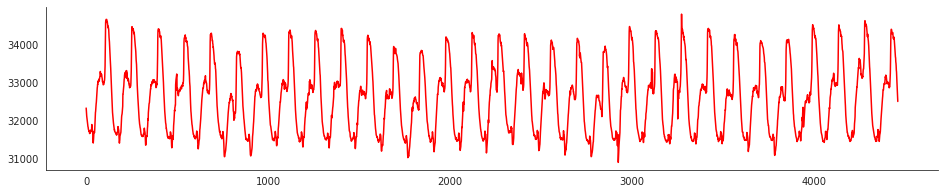

In [ ]:
plt.figure(figsize=(16, 3))
#plt.plot(df['y'], color='black')
plt.plot(test_pred, color = 'red')
plt.plot()